In [80]:
%reset -f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

In [81]:
def estimate_gaussian(X):
    mu = np.mean(X, axis =0)
    sigma2 = np.var(X, axis =0)
    return mu, sigma2



def multivariate_gaussian(x, mu, cov):
    #Calculation of multivariate guassian pdf
    #x is the point, mu: list mean of all fields, 
    #cov: covariance matrix
    
    size = len(x)
#     print(size)
#     print(len(mu))
    
    if size == len(mu) and (size, size) == cov.shape:
        det = np.linalg.det(cov)
        if det == 0:
            raise NameError("The covariance matrix can't be singular")
        
        norm_const = 1.0/ ( math.pow((2*np.pi),float(size)/2) * math.pow(det,1.0/2) )
        x_mu = np.matrix(x - mu)
#         print(x_mu)
        x_mu_t = x_mu.T
#         print(x_mu_t)
        inv = np.linalg.inv(cov)
        inv = np.matrix(inv)

        result = math.pow(math.e, -0.5 * (x_mu * inv * x_mu_t))
        return norm_const * result
    else:
        raise NameError("The dimensions of the input don't match")   

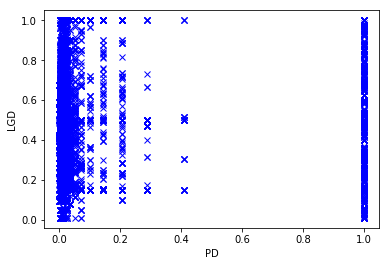

In [82]:
X = pd.read_excel('PRA18.xlsx')
plt.plot(X.loc[:, 'PD'], X.loc[:, 'DOWNTURN_LGD'], 'bx')
plt.xlabel('PD')
plt.ylabel('LGD');
plt.show()

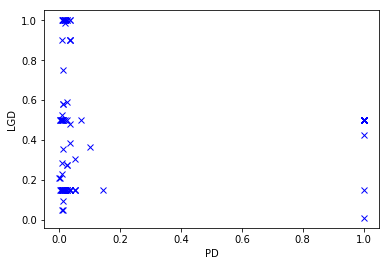

In [83]:
X= X[:100]
X = X[['PD','DOWNTURN_LGD']]
plt.plot(X.loc[:, 'PD'], X.loc[:, 'DOWNTURN_LGD'], 'bx')
plt.xlabel('PD')
plt.ylabel('LGD');
plt.show()

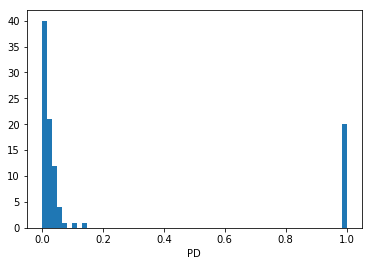

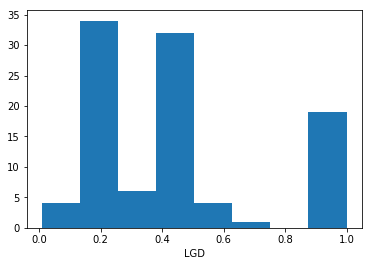

In [84]:
#checking for normal distribution
plt.hist(X.loc[:,'PD'],bins = 'auto')
plt.xlabel('PD')
plt.show()

plt.hist(X.loc[:, 'DOWNTURN_LGD'],bins = 'auto')
plt.xlabel('LGD')
plt.show()

In [85]:
mu, sigma2 = estimate_gaussian(X[['PD','DOWNTURN_LGD']])
covariance = np.cov(X.loc[:,'PD'], X.loc[:,'DOWNTURN_LGD'])

X['pdf'] = np.nan
for y in range(len(X)):
    temp = [X.loc[y,'PD'],X.loc[y,'DOWNTURN_LGD']]
    X.loc[y,'pdf'] = multivariate_gaussian(temp,mu,covariance)

In [86]:
covariance.shape

(2, 2)

In [87]:
X_outlier = X[X.pdf <= 0.2]
X_outlier

,PD,DOWNTURN_LGD,pdf
10,1.0,0.150000,0.112361
16,1.0,0.500100,0.181129
18,1.0,0.500100,0.181129
19,1.0,0.500100,0.181129
23,1.0,0.427115,0.182649
27,1.0,0.500100,0.181129
29,1.0,0.500100,0.181129
31,1.0,0.500100,0.181129
37,1.0,0.500100,0.181129
38,1.0,0.500100,0.181129


In [88]:
xlist = np.linspace(0, 1, num =50)
ylist = np.linspace(0, 1, num = 50)
xx, yy = np.meshgrid(xlist, ylist) 
plt.figure()

zz = np.zeros(xx.shape)

for i in range(xx.shape[0]):
    for j in range(yy.shape[1]):
        zz[i,j] = multivariate_gaussian([xx[i,j], yy[i,j]],mu,covariance)


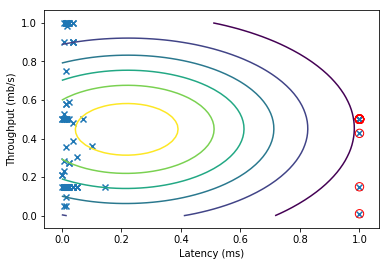

In [89]:
# plot the data
plt.scatter(X.iloc[:,0],X.iloc[:,1],marker="x")

# Circling of anomalies
plt.scatter(X_outlier.iloc[:,0],X_outlier.iloc[:,1],marker ="o",facecolor="none",edgecolor="r",s=70)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

plt.contour(xx, yy, zz)


plt.show()